# Load libraries 

In [1]:
import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.firefox.options import Options

options = Options()
options.headless = True

In [2]:
from PIL import Image  
import PIL 
import os
import PyPDF2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [3]:
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

# Scraping

In [ ]:
# driver = webdriver.Chrome(executable_path=r'D:\OmniTechWork + Dali\IIIT Scraping\chromedriver.exe')
firefoxPath="/media/arihant/Local Disk/DataAnalysis/000 - IIIT Scraping/geckodriver"
content = []

driver = webdriver.Firefox(executable_path=firefoxPath)
driver.get("http://web2py.iiit.ac.in/research_centres/publications/index?type=Masters%20Theses&start_date=1988-01-01")

MS_source = driver.page_source
doc = BeautifulSoup(MS_source, "html.parser")

links = doc.find('ol').findAll('a', href=True)

content_links = []
for link in links:
    content_links.append(link.get('href'))

content_links[::2]

for link in content_links[::2]:
    link = 'http://web2py.iiit.ac.in' + link
#     print(link)
    driver.get(link)
    link_source = driver.page_source
    doc = BeautifulSoup(link_source, "html.parser")
    text = doc.findAll('td', class_='expandable column2')
    text = cleanhtml(str(text))
    content.append(text)
driver.close()

In [ ]:
ms_thesis = []

for text in content:
    thesis_info = []
    text_list = text.lstrip('[\n').rstrip('\n\t ]').split('\n')
    for i, text in enumerate(text_list):
        if text != '':
            if 'Author' in text:
                title = text_list[:i]
                author = text
            if 'Date' in text:
                date = text
            if 'Report' in text:
                report = text
            if 'Advisor' in text:
                advisor_i = i
                advisor = text
            if 'pdf' in text:
                abstract = text_list[advisor_i+1:i]
            lab = text_list[-1]
    ms_thesis.append([title, author, date, report, advisor, abstract, lab])
    
ms_thesis[1]

## Extract content from PDFs

In [5]:
# Extract content from 1st page pdfs

entries = os.listdir('./data/ms_theses/')

pdf_content = []
for entry in entries:
    print(entry)
    try:
        pdfFileObj = open('./data/ms_theses/' + entry, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj, strict=False) 
        if pdfReader.isEncrypted:
            try:
                pdfReader.decrypt('')
            except NotImplementedError:
                print('Cant do shit!')
        pageObj = pdfReader.getPage(0) 
        pdf_content.append(pageObj.extractText()) 
        pdfFileObj.close()
    except AssertionError:
        print('Cant do shit!')

mastersthesis.pdf.8019fc9b191173cb.5468657369732e706466.pdf
mastersthesis.pdf.80422ec9a776089b.556e6465727374616e64696e672050656f706c6520696e204c6f77205265736f7572636564204c616e6775616765732028536168696c205377616d692c204d532c20323031333032303731292e706466.pdf
mastersthesis.pdf.80645e53273ed916.4578706c6f726174696f6e206f66206d756c7469706c6520696d6167696e67206d6f64616c69746965732e2e2e202847616d616c617061746920736169206a61686e6176692c204543452c20323031333334303036292e706466.pdf
mastersthesis.pdf.8069b07384935aff.5261646865736879616d5f5468657369735f5665722d322e302e706466.pdf
mastersthesis.pdf.80b55b0ed030877d.4d535f7468657369735f3230303433313030342d4861726e6174682e706466.pdf
mastersthesis.pdf.80c94689051f16c1.5468657369735f766976656b2e706466.pdf
mastersthesis.pdf.80caabe8b9f51c99.5361706e615f536861726d615f5468657369732e706466.pdf
mastersthesis.pdf.80fef7c38123a0d3.54686573697346696e616c2e706466.pdf
mastersthesis.pdf.81336f0f2522cdfe.4d696869724a61696e4d53323031305468657369732e706466.pdf
ma

mastersthesis.pdf.8efb9a3ee421a644.4b617274696b20647574742e706466.pdf
mastersthesis.pdf.9e71329468329061.44657661646174685f4d5068696c5f5468657369732e706466.pdf
mastersthesis.pdf.9e8a5c372ad418f0.7468657369732e706466.pdf
mastersthesis.pdf.9e8b2d66388c0ac6.5468657369732d4a796f7468696b612e706466.pdf
mastersthesis.pdf.9ee996a9303d8d36.5468657369732e706466.pdf
mastersthesis.pdf.9f14e2b5dd7718f3.5068616e6947616464655468657369732d757064617465642e706466.pdf
mastersthesis.pdf.9f365894fdb7d642.4578706c6f72696e672043726f73732d6c696e6775616c2053756d6d6172697a6174696f6e2e2e2e20284e6973617267204b6574616e204a6861766572692c204353442c20323031333032313935292e706466.pdf
mastersthesis.pdf.9f37b7f07c5ca010.50726979616e6b5f46696e616c5f5468657369735f3230313335303834352e706466.pdf
mastersthesis.pdf.9f3fbb4d84282219.53757279615f5468657369732e706466.pdf
mastersthesis.pdf.9fb6a6ad6f169461.7468657369735f72616a6573682e706466.pdf
mastersthesis.pdf.9fc81428880d19d6.535552414a2052454444595f3230313435303837315f7468657

mastersthesis.pdf.a27495c098f5c8cc.5261676876656e6472615f4d616c6c2e706466.pdf
mastersthesis.pdf.a27fba9e26d6f0a1.7361727468616b2075706164687961792066696e616c207468657369732e706466.pdf
mastersthesis.pdf.a2cf0754c5ed9e57.737564686565722d6d737468657369732d66696e616c7072696e742e706466.pdf
mastersthesis.pdf.a320b0e90bafc5a3.46696e616c205468657369732e706466.pdf
mastersthesis.pdf.952b1610db253047.5468657369732e706466.pdf
mastersthesis.pdf.9536d85ba96a9429.5369676e65645f5468657369735f4e6568612e706466.pdf
mastersthesis.pdf.954ccdeaba617dac.546865736973204e616368696b65742e706466.pdf
mastersthesis.pdf.955ef751645ba6b3.4d53207468657369732e706466.pdf
mastersthesis.pdf.956e2489c4a0cc98.4d6568616b20536f6f642028323031323334303032292e706466.pdf
mastersthesis.pdf.957b160ae49e312d.5468657369735f3230313133313134392e706466.pdf
mastersthesis.pdf.957d1770cd3fa69a.4d61696e2e706466.pdf
mastersthesis.pdf.95a6b91c0301331c.456666696369656e7420616e6420486967682d537065656420464654204172636869746563747572657320666f7

mastersthesis.pdf.b10aa5a5f20048db.53696e6468754b6f6c6c695f46696e616c4d535468657369732e706466.pdf
mastersthesis.pdf.b111f4157be7da23.41204475616c2050726f63657373205265696e666f7263656d656e74204c6561726e696e672e2e2e2854656a617320536176616c69612c204d532c20323031353037353130292e706466.pdf
mastersthesis.pdf.b13cf6afdddb3f62.52617361676e61546865736973323031332e706466.pdf
mastersthesis.pdf.b15e65b6a106544e.7468657369732e706466.pdf
mastersthesis.pdf.b191a3f1c6439ca6.54686573697346696e616c5369676e65643230313130323135312e706466.pdf
mastersthesis.pdf.b19341bdb990b97b.616d626174695468657369732e706466.pdf
mastersthesis.pdf.b1955faf1ff139cf.3230313230323135375f53616e6465657053726963686172616e4d756b6b755f5468657369732e706466.pdf
mastersthesis.pdf.b1a34b2ea5f0dd3f.412064657369676e20666f7220616e206175746f6d617465642e2e2e20284b61727468696b20476f70696e6174682c204d532c2020323031343530383537292e706466.pdf
mastersthesis.pdf.b1bede92fd5e54d9.6861726973685468657369732e706466.pdf
mastersthesis.pdf.b1d764ce7d8f

mastersthesis.pdf.8dad5e07dadbf09c.4b616e6e616e5f5468657369732e706466.pdf
mastersthesis.pdf.8dcdf0f859ef6230.446973747269627574696f6e616c2053656d616e7469637320616e64204e657572616c204e6574776f726b20626173656420496d70726f76656d656e74732e2e2e2853696c7061204b616e6e6567616e74692c204d532c202530413230303630323031322
mastersthesis.pdf.8dded7eee87fae33.5352495f54454a415f494949545f48796465726261645f4d535f62795f52657365617263685f5468657369732e706466.pdf
mastersthesis.pdf.8df290912697b40b.4468727576204b6861747461725f46696e616c2e706466.pdf
mastersthesis.pdf.8dfd5272e468db3f.7368656574616c546865736973323031302e706466.pdf
mastersthesis.pdf.8dff7a705e65f1bb.5368617368616e6b204167726177616c2e706466.pdf
mastersthesis.pdf.8e1f44d90863c7a0.5669647961646861724d53546865736973323031352e706466.pdf
mastersthesis.pdf.8e456c3e68114c0b.4d6f68642e20416e7761722028323031313332363338292e706466.pdf
mastersthesis.pdf.8b95e18fd48d03cd.526973686162682d7468657369732e706466.pdf
mastersthesis.pdf.8b99dbe487a3a32d.4c61737961

mastersthesis.pdf.8f2b448cc4c20757.4d535f5448455349535f475552534841414e542d636f6d707265737365642e706466.pdf
mastersthesis.pdf.8f326cbe93090e18.726168756c5f7468657369732e706466.pdf
mastersthesis.pdf.8f37acb179d89a7d.446576656c6f70696e672053656d616e74696320526f6c65204c6162656c657220666f722048696e646920616e64205572647520284d61617a20416e776172204e6f6d616e692c204d532c20323031333233363031292e706466.pdf
mastersthesis.pdf.8f5aefb765f6b0aa.567961732052616d2028323030383032303432292e706466.pdf
mastersthesis.pdf.8f6dc8df81fb857d.7468657369732d766572322d302e706466.pdf
mastersthesis.pdf.8f6ec70e6870fd36.4e6568612d5468657369732e706466.pdf
mastersthesis.pdf.8f78c6a1c708cadb.5468657369735f312832292e706466.pdf
mastersthesis.pdf.8f8259abb0acd2dd.53616d726174204e616761726a756e61205468657369732e706466.pdf
mastersthesis.pdf.8f8dce9adcb0327f.5468657369735f66696e616c2e706466.pdf
mastersthesis.pdf.8f9f749715c4dbdc.4b72616e7468695f5468657369735f66696e616c44726166742e706466.pdf
mastersthesis.pdf.a0ff99911bd356f5

mastersthesis.pdf.949b0df33bbe3be0.73616d706c655468657369732d4d642e536861686565722d5a616d616e2e706466.pdf
mastersthesis.pdf.94a42fe250661698.416b68696c614d616e6e652d5468657369732e706466.pdf
mastersthesis.pdf.94bd162373c39ce4.4c6561726e696e67204465657020616e6420436f6d70616374204d6f64656c7320666f722047657374757265205265636f676e6974696f6e20284b6f7573746176204d756c6c69636b2c204d532c20323031333037353539292e706466.pdf
mastersthesis.pdf.94eb42217f3fbb54.456e68616e63696e67207468652051756572792d42792d4f626a65637420417070726f616368207573696e6720536368656d612053756d6d6172697a6174696f6e20546563686e69717565732e706466.pdf
mastersthesis.pdf.94ec19fe74d85ee6.446976796120447576767572692028323031323332353535292e706466.pdf
mastersthesis.pdf.95078b70a5841ba9.4578706c6f6974696e67206164207370616365206f66206c6f6e67207461696c2071756572696573207468726f7567682e2e2e28416d617220427564686972616a612c204d532c20323031333033303039292e706466.pdf
mastersthesis.pdf.950d840eea7932e8.5468657369732d526168756c476f7574616d2e7

mastersthesis.pdf.baf8d88289439b28.73616d706c655468657369732834292e706466.pdf
mastersthesis.pdf.bb261d6b47122cd2.73796e7461637469632d7472616e736665722d72656c6174696f6e732d66696e616c2d636f70792d7468657369732e706466.pdf
mastersthesis.pdf.bb2fa5afdec5aa9b.537562686173685f5468657369732e706466.pdf
mastersthesis.pdf.bb3833824ef5d2ea.42687576616e616e204b616c69616e6e616e2028323031313332353835292e706466.pdf
mastersthesis.pdf.bb4f969f79e953b8.46696e616c5f7468657369732e706466.pdf
mastersthesis.pdf.bb6b6c187375523b.74686573697366696e616c312e706466.pdf
mastersthesis.pdf.bb99aa2c83c23480.5468657369732e706466.pdf
mastersthesis.pdf.bb9bc1b9a635a8e0.5468657369732e706466.pdf
mastersthesis.pdf.bba64681083f9e75.4d535468657369735f536e6568615f64726166745f66696e616c2e706466.pdf
mastersthesis.pdf.bbac24f64afc2106.5468657369735f4368616e64616e2e706466.pdf
mastersthesis.pdf.bbc3421bab45e09c.3230313330373637385f73756d616e5f646f776c616761725f4d535f7468657369732e706466.pdf
mastersthesis.pdf.bbc55d5059261913.6164697

mastersthesis.pdf.af3feedea6870ae7.546f776172647320556e6465727374616e64696e6720426f6c6c79776f6f64204c79726963732028447275736874692041706f6f72766120472c204d532c20323031323235303131292e706466.pdf
mastersthesis.pdf.b029b49a20437597.497368615f46696e616c5f5468657369735f5375626d697373696f6e2e706466.pdf
mastersthesis.pdf.b21fc0a83352ede0.436f766572616765205061747465726e732d626173656420416c6c6f636174696f6e20417070726f61636865732e2e2e202856616464616469204e61676120536169204b617679612c204353442c20323031323033303038292e706466.pdf
mastersthesis.pdf.b2809f3bb205acbb.44697679615f7468657369735f3230313333313036392e706466.pdf
mastersthesis.pdf.b33b068e79a84dd4.56756e646176616c6c695f7468657369732e706466.pdf
mastersthesis.pdf.bd58eda345dfdf20.44657369676e206f6620496e74657266616365204369726375697420666f7220446966666572656e7469616c2043617061636974616e6365204d6561737572656d656e7420285377617468692052656464792.pdf
mastersthesis.pdf.bd60b06cf1e203e8.46696e616c20546865736973202848617273686974204475626579292e7064

mastersthesis.pdf.8af30a4cc85935f2.626f6f6b2e706466.pdf
mastersthesis.pdf.8b08da05b2855ab6.416e616c79736973206f66204c616e65204c6576656c2044796e616d69637320666f7220456d657267656e63792056656869636c65732028416b617368204167617277616c2c204d532c20323031313032323030292e706466.pdf
mastersthesis.pdf.8b1f1e92d2f5e2ac.6b757368616772615f7468657369735f66696e616c2e706466.pdf
mastersthesis.pdf.be7c6bee493d5e36.52657472696576696e672053656d616e746963616c6c792053696d696c6172205175657374696f6e732e2e2e28417270697461204461732c204d532c20323031343037353336292e706466.pdf
mastersthesis.pdf.be7dac6626307589.6d6179616e6b6a756e656a61546865736973323031332e706466.pdf
mastersthesis.pdf.be970db636b1c580.4e61726573682d4b756d61722d5468657369732e706466.pdf
mastersthesis.pdf.be993c19930a5061.416268696a656574206b756d6172206d735f7468657369735f696969742e706466.pdf
mastersthesis.pdf.be993cd4995b8a32.5374756479206f6620656666656374206f662050726f6365737320566172696174696f6e73206f6e205352414d2043656c6c2028323030383332303036292e7

In [45]:
pdf_content[690].split()

['AgreementcanbeEasierthanPoint-to-Point',
 'Communication',
 'PrasantGopal',
 'prasant@research.iiit.ac.in',
 'InternationalInstituteofInformationTechnology',
 'Hyderabad,India',
 'May2009']

In [24]:
df_pdf_content = pd.DataFrame()
for content in pdf_content:
    content = content.split()

SyntaxError: invalid syntax (<ipython-input-24-70f0fb7c8f2c>, line 1)

In [17]:
pdf_content[0]

'TemporaldynamicsofCognitiveprocesses:CasestudiesonSequence\nlearningandAffectiveadaptationofemotions\nThesissubmittedinpartial\noftherequirementsforthedegreeof\nMasterofSciencebyResearch\nin\nComputerScienceandEngineering\nby\nSnehaKummetha\n201202139\nkummetha.sneha@research.iiit.ac.in\nInternationalInstituteofInformationTechnology\nHyderabad-500032,INDIA\nDecember2018\n'

In [ ]:
df_ms = pd.DataFrame(ms_thesis)
# df_ms = df_ms.drop(columns = 5,axis=1)
# df_ms.columns = (['Thesis Title', 'Name', 'Date', 'Advisor', 'Report No.'])

# df_ms.Name = df_ms.Name.str.rstrip(',')
# df_ms.Date = df_ms.Date.str.rstrip('.')
# df_ms.Advisor = df_ms.Advisor.str[8:]
# df_ms = pd.concat([df_ms, df_ms.Advisor.str.split(',', expand=True)], axis=1)
# df_ms = pd.concat([df_ms, df_ms.Date.str.split(' ', expand=True)], axis=1)

# df_ms = df_ms.drop(columns=['Advisor','Date'], axis=1)
# df_ms.columns = (['Thesis Title', 'Name', 'Report No.', 'Advisor_1', 'Advisor_2', 'Advisor_3','Month','Year'])
df_ms.head()

# Analysis from Scraping Website Data

In [4]:
# df_ms.to_csv('./ms_theses_2.csv')
df_ms = pd.read_csv('./data/ms_theses.csv')

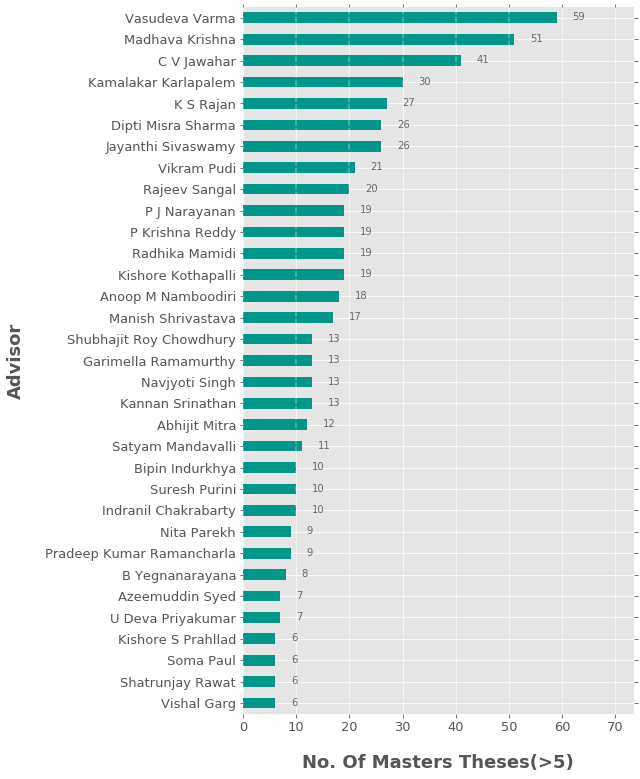

In [5]:
x = df_ms['Advisor_1'].value_counts().sort_values()
x = x[x > 5]
ax = x.plot(kind='barh', figsize=(7,13), color='#009688', fontsize=13)
ax.set_alpha(0.8)

for i, v in enumerate(x):
    ax.text(v + 3, i-0.12, str(v), color='dimgrey')

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("No. Of Masters Theses(>5)", labelpad=20, weight='bold', size=18)

# Set y-axis label
ax.set_ylabel("Advisor", labelpad=20, weight='bold', size=18)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Image.open('testplot.png').save('testplot.jpg','JPEG')


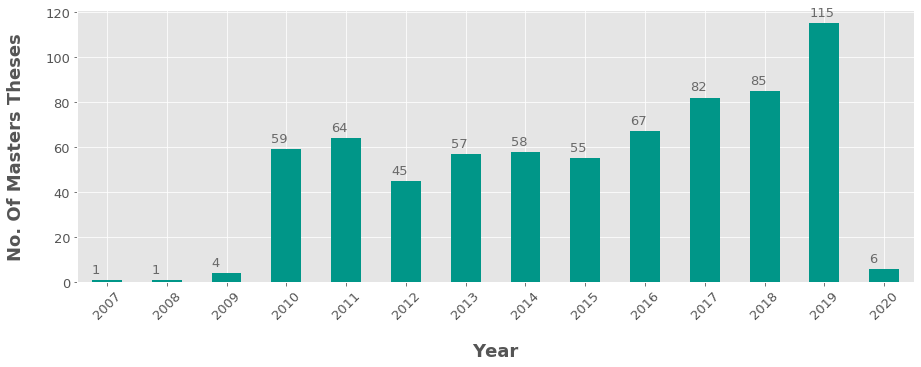

In [6]:
x = df_ms.Year.value_counts().sort_index()
ax = x.plot.bar(figsize=(15,5), color='#009688', fontsize=13)

ax.set_xlabel("Year", labelpad=20,weight='bold', size=18)
ax.set_ylabel("No. Of Masters Theses", labelpad=20, weight='bold', size=18)
years = range(2007,2021)
ax.set_xticklabels(years, rotation=45)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+3, str(round((i.get_height()), 2)), fontsize=13, color='dimgrey')

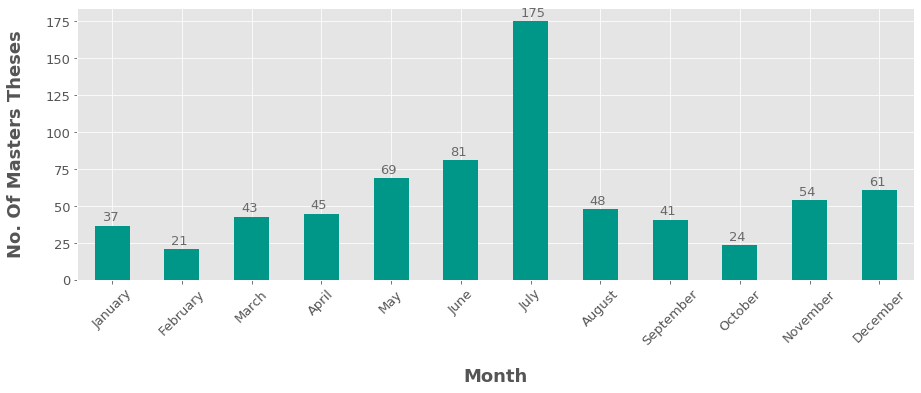

In [7]:
x = pd.to_datetime(df_ms.Month, format='%B', errors='coerce').dt.month.value_counts().sort_index()

ax = x.plot.bar(figsize=(15,5), color='#009688', fontsize=13)

ax.set_xlabel("Month", labelpad=20, weight='bold', size=18)
ax.set_ylabel("No. Of Masters Theses", labelpad=20, weight='bold', size=18)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(months, rotation=45)


for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+3, str(round((i.get_height()), 2)), fontsize=13, color='dimgrey')

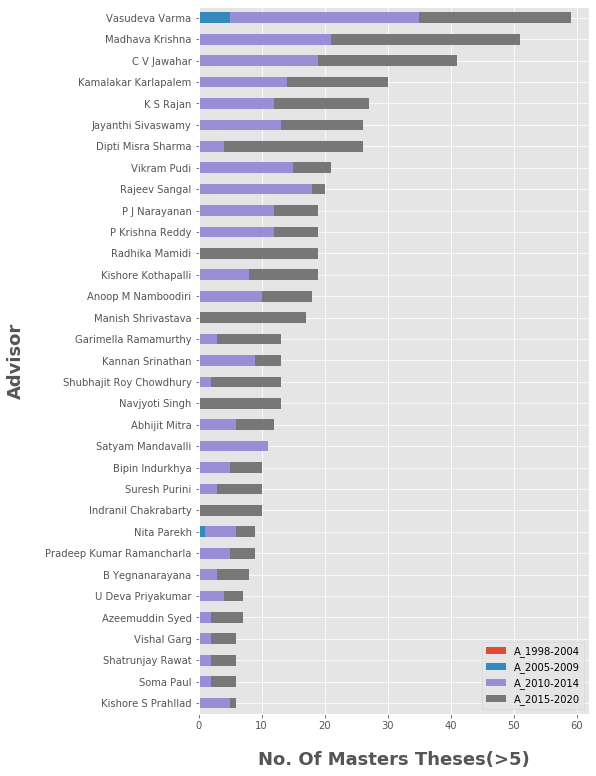

In [8]:
df_ms_new = pd.DataFrame(df_ms['Advisor_1'][(df_ms['Year'] >= 1990) & (df_ms['Year'] < 2005)].value_counts().reindex(df_ms.Advisor_1.unique(), fill_value=0))
df_ms_new['A_2005-2009'] = pd.DataFrame(df_ms['Advisor_1'][(df_ms['Year'] >= 2005) & (df_ms['Year'] < 2010)].value_counts().reindex(df_ms.Advisor_1.unique(), fill_value=0))
df_ms_new['A_2010-2014'] = pd.DataFrame(df_ms['Advisor_1'][(df_ms['Year'] >= 2010) & (df_ms['Year'] < 2015)].value_counts().reindex(df_ms.Advisor_1.unique(), fill_value=0))
df_ms_new['A_2015-2020'] = pd.DataFrame(df_ms['Advisor_1'][(df_ms['Year'] >= 2015) & (df_ms['Year'] <= 2020)].value_counts().reindex(df_ms.Advisor_1.unique(), fill_value=0))

df_ms_new['Total'] = df_ms_new['Advisor_1'] + df_ms_new['A_2005-2009'] + df_ms_new['A_2010-2014'] + df_ms_new['A_2015-2020']
df_ms_new = df_ms_new.rename(columns={'Advisor_1':'A_1998-2004'})
df_ms_new = df_ms_new.sort_values(by='Total')
df_ms_new = df_ms_new[df_ms_new['Total'] > 5]
# df_ms_new
Total = df_ms_new.pop('Total')
ax = df_ms_new.plot(kind='barh', figsize=(7,13), stacked=True);

# for i in ax.patches:
#     ax.text(i.get_width()+.3, i.get_y()+.5, str(round((i.get_width()), 2)), fontsize=12,color='dimgrey')

# Set x-axis label
ax.set_xlabel("No. Of Masters Theses(>5)", labelpad=20, weight='bold', size=18)

# Set y-axis label
ax.set_ylabel("Advisor", labelpad=20, weight='bold', size=18)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [15]:
df_ms_2 = pd.read_csv('./data/ms_theses_withAbstract.csv')
df_ms_2.head()

,Unnamed: 0,0,1,2,3,4,5,6
0,0,['Prospects of searches for leptoquarks decayi...,Author: Kushagra Chandak,Date: 2020-02-25,Report no: IIIT/TH/2020/4,Advisor:Subhadip Mitra,['Abstract The Standard Model of particle phys...,Centre for Spatial Informatics
1,1,['Towards developing a multiple modality fusio...,Author: Divya Jyothi Gaddipati,Date: 2020-02-12,Report no: IIIT/TH/2020/8,Advisor:Jayanthi Sivaswamy,['Abstract Glaucoma is a major eye disease whi...,Centre for Visual Information Technology
2,2,['Multilingual Phonetic Features for Indian La...,Author: Tirusha Mandava,Date: 2020-02-06,Report no: IIIT/TH/2020/6,Advisor:Anil Kumar Vuppala,['Abstract Language identification (LID) refer...,Centre for Language Technologies Research Centre
3,3,['Adapting Language Models for Style Transfer'...,Author: Bakhtiyar Syed,Date: 2020-02-05,Report no: IIIT/TH/2020/5,Advisor:Vasudeva Varma,['Abstract “Natural language processing is the...,Centre for Language Technologies Research Centre
4,4,['Agent Strategies for the Hide-and-Seek Game'...,Author: Akshat Tandon,Date: 2020-01-27,Report no: IIIT/TH/2020/7,Advisor:Kamalakar Karlapalem,['Abstract We are given an environment with so...,Centre for Data Engineering


Text(0, 0.5, 'Research Center')

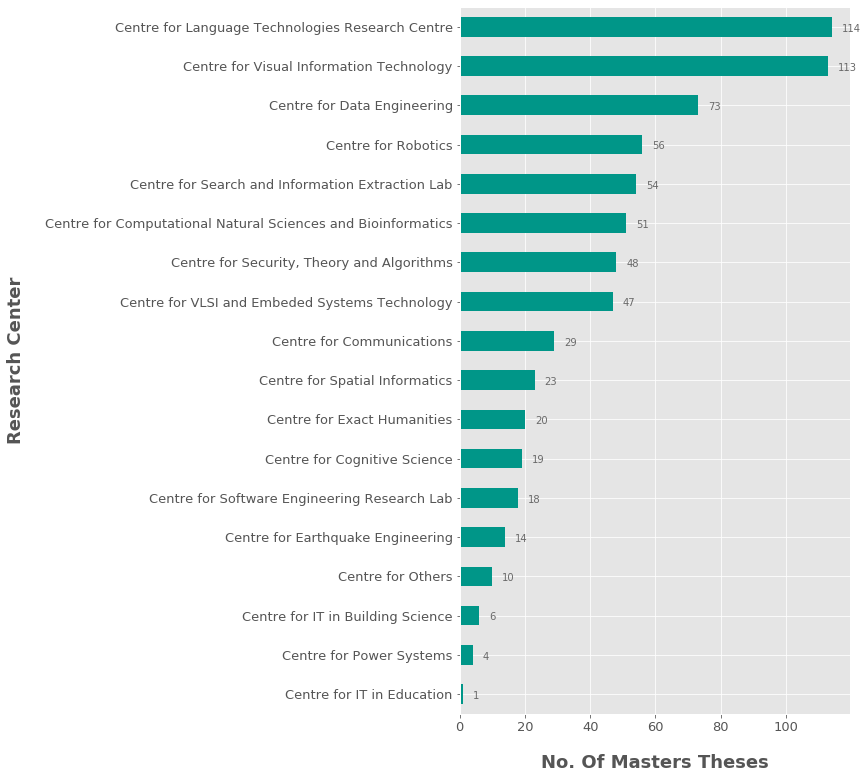

In [43]:
x = df_ms_2['6'].value_counts().sort_values()
ax = x.plot(kind='barh', figsize=(7,13), color='#009688', fontsize=13)
ax.set_alpha(0.8)

for i, v in enumerate(x):
    ax.text(v + 3, i-0.12, str(v), color='dimgrey')

ax.set_xlabel("No. Of Masters Theses", labelpad=20, weight='bold', size=18)
ax.set_ylabel("Research Center", labelpad=20, weight='bold', size=18)

# for i in ax.patches:
#     ax.text(i.get_x()+0.1, i.get_height()+3, str(round((i.get_height()), 2)), fontsize=13, color='dimgrey')

In [48]:
img = Image.open('./images/1.png')
img = img.convert("RGB")
img.save('./images/1.jpg')


# PhD Theses 

In [ ]:
driver = webdriver.Firefox(options=options)

driver.get("http://web2py.iiit.ac.in/research_centres/publications/index?type=PhD%20Theses&start_date=1988-01-01")

PHD_source = driver.page_source

driver.close()

In [ ]:
doc = BeautifulSoup(PHD_source, "html.parser")
rows = doc.find('ol').findAll('li')
print(len(rows))

In [ ]:
phd_thesis = []

for row in rows:
    thesis_info = []
    text_list = row.text.strip().split('\n')
    for text in text_list:
        thesis_info.append(text.strip())
    phd_thesis.append(thesis_info)
phd_thesis[0]

In [ ]:
df_phd_theses = pd.DataFrame(phd_thesis)
df_phd_theses = df_phd_theses.drop(columns = 5,axis=1)
df_phd_theses.columns = (['Thesis Title', 'Name', 'Date', 'Advisor', 'Report No.'])

df_phd_theses.Name = df_phd_theses.Name.str.rstrip(',')
df_phd_theses.Date = df_phd_theses.Date.str.rstrip('.')
df_phd_theses.Advisor = df_phd_theses.Advisor.str[8:]
df_phd_theses = pd.concat([df_phd_theses, df_phd_theses.Advisor.str.split(',', expand=True)], axis=1)

df_phd_theses = df_phd_theses.drop(columns='Advisor', axis=1)
df_phd_theses.columns = (['Thesis Title', 'Name', 'Date', 'Report No.', 'Advisor_1', 'Advisor_2'])
df_phd_theses

In [109]:
# df_phd.to_csv('./data/phd_thesis.csv', index=None)
df_phd = pd.read_csv('./data/phd_thesis.csv')
# df_phd = pd.concat([df_phd, df_phd.Date.str.split('-', expand=True)], axis=1)
# df_phd = df_phd.drop(columns = 'Date')
# df_phd.columns = (['Thesis Title', 'Name', 'Report No.', 'Advisor_1', 'Advisor_2', 'Month','Year'])
df_phd

,Thesis Title,Name,Report No.,Advisor_1,Advisor_2,Month,Year
0,Towards Revitalizing Diversity: A Study of the...,Harsh Satya,Report no: IIIT/TH/2020/2,Navjyoti Singh,Rajeev Sangal,Jan,2020
1,Vowel Region based Speech Analysis and Applica...,Thirumuru Ramakrishna,Report no: IIIT/TH/2019/127,Anil Kumar Vuppala,NaN,Dec,2019
2,Structural Dynamics and Catalytic Mechanism of...,Navneet Bung,Report no: IIIT/TH/2019/129,Deva U Priyakumar,Gopalakrishnan Bulusu,Nov,2019
3,Anatomical Structure Segmentation in Retinal I...,Arunava Chakravarty,Report no: IIIT/TH/2019/123,Jayanthi Sivaswamy,NaN,Nov,2019
4,Role of Non-canonical Base-pairs and their hig...,Sohini Bhattacharya,Report no: IIIT/TH/2019/118,Abhijit Mitra,NaN,Nov,2019
5,Concept Hierarchy Based Diverse Frequent Patte...,Kumara Swamy Mittapally,Report no: IIIT/TH/2019/100,P Krishna Reddy,NaN,Aug,2019
6,"Instance Invariant Visual Servoing,",Harith Pandya,Report no: IIIT/TH/2019/104,Madhava Krishna,NaN,Jul,2019
7,EARLY DESIGN METHODOLOGY FOR ENERGY EFFICIENT ...,Aviruch Bhatia,Report no: IIIT/TH/2019/98,Vishal Garg,NaN,Jul,2019
8,"Recognizing People in Image and Videos,",Vijay Kumar,Report no: IIIT/TH/2019/84,Anoop M Namboodiri,C V Jawahar,Jul,2019
9,Analysis of Emotional Speech using Excitation ...,Gangamohan P,Report no: IIIT/TH/2019/87,B Yegnanarayana,Suryakanth V Gangashetty,Jul,2019


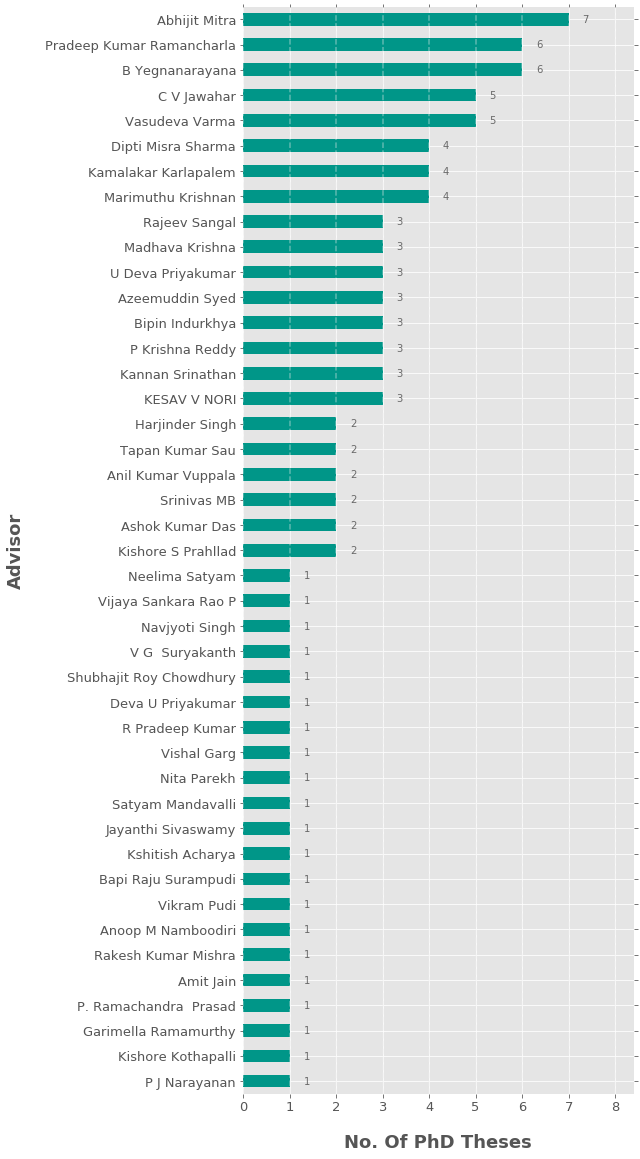

In [99]:
x = df_phd['Advisor_1'].value_counts().sort_values()
# x = x[x > 2]
ax = x.plot(kind='barh', figsize=(7,20), color='#009688', fontsize=13)
ax.set_alpha(0.8)

for i, v in enumerate(x):
    ax.text(v + 0.3, i-0.12, str(v), color='dimgrey')

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("No. Of PhD Theses", labelpad=20, weight='bold', size=18)

# Set y-axis label
ax.set_ylabel("Advisor", labelpad=20, weight='bold', size=18)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

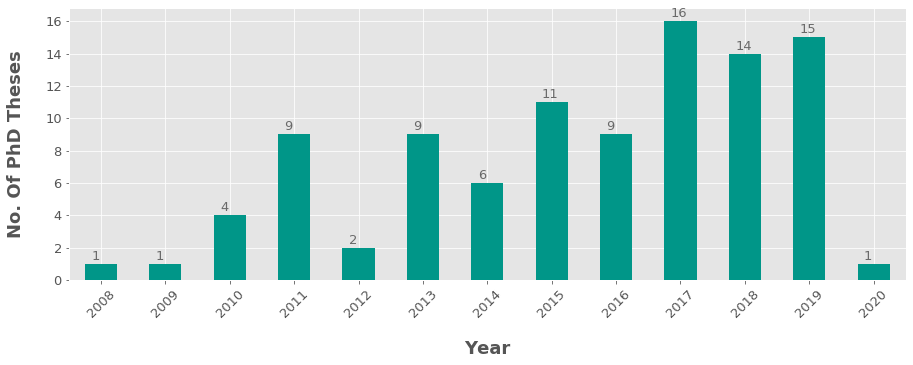

In [124]:
x = df_phd.Year.value_counts().sort_index()
ax = x.plot.bar(figsize=(15,5), color='#009688', fontsize=13)

ax.set_xlabel("Year", labelpad=20,weight='bold', size=18)
ax.set_ylabel("No. Of PhD Theses", labelpad=20, weight='bold', size=18)
years = range(2008,2021)
ax.set_xticklabels(years, rotation=45)

for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+0.25, str(round((i.get_height()), 2)), fontsize=13, color='dimgrey')

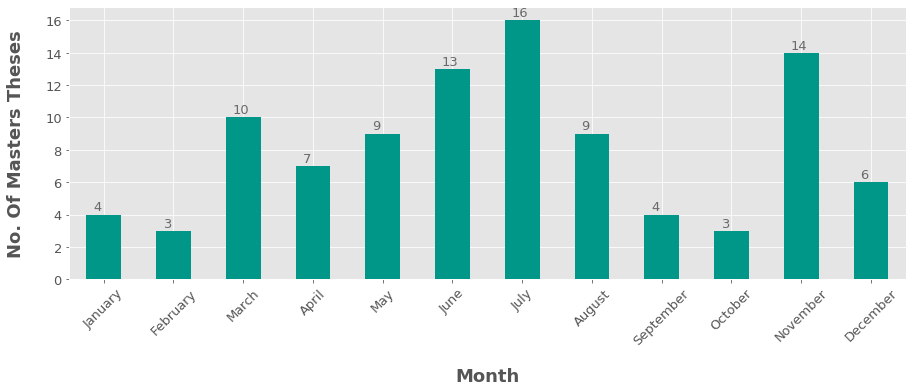

In [133]:
x = pd.to_datetime(df_phd.Month, format='%b', errors='coerce').dt.month.value_counts().sort_index()

ax = x.plot.bar(figsize=(15,5), color='#009688', fontsize=13)

ax.set_xlabel("Month", labelpad=20, weight='bold', size=18)
ax.set_ylabel("No. Of Masters Theses", labelpad=20, weight='bold', size=18)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(months, rotation=45)


for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+0.25, str(round((i.get_height()), 2)), fontsize=13, color='dimgrey')

# Conference Papers

In [ ]:
driver = webdriver.Firefox(options=options)

driver.get("http://web2py.iiit.ac.in/research_centres/publications/index?type=Conference%20Papers&start_date=1988-01-01")

CP_source = driver.page_source

driver.close()  

In [ ]:
doc = BeautifulSoup(CP_source, "html.parser")
rows = doc.find('ol').findAll('li')
print(len(rows))

In [ ]:
c_papers = []

for row in rows:
    paper_info = []
    text_list = row.text.strip().split('\n')
    for text in text_list:
        text = text.strip(" ,\'")
        if text != '' and text != '.':
            paper_info.append(text)
    c_papers.append(paper_info)
c_papers[1732]

In [ ]:
df_cp = pd.read_csv('./cp.csv')
df_cp.columns = (['Thesis Title', 'Authors', 'Conference', 'Date', 'Conf. Place','Report No.'])
df_cp = pd.concat([df_cp, df_cp.Authors.str.split(',', expand=True)], axis=1)
df_cp = df_cp.drop(columns='Authors', axis=1)
df_cp = pd.concat([df_cp, df_cp.Date.str.split('-', expand=True)], axis=1)
df_cp = df_cp.drop(columns='Date', axis=1)
df_cp.columns = (['Thesis Title','Conference', 'Conf. Place','Report No.', 'Author_1', 'Author_2', 'Author_3', 'Author_4', 'Author_5', 'Author_6', 'Author_7', 'Author_8', 'Author_9', 'Author_10', 'Author_11', 'Author_12', 'Month', 'Year'])
df_cp.head()

In [ ]:
df_cp.to_csv('./cp.csv',index=None)

In [ ]:
df_cp = pd.read_csv('./cp.csv')
plt.rcParams["figure.figsize"] = [20, 5]
temp = df_cp.Year.value_counts().sort_index().plot.bar()

In [ ]:
plt.rcParams["figure.figsize"] = [20, 5]
df_cp["Month"] = pd.to_datetime(df_cp.Month, format='%b', errors='coerce').dt.month
temp = df_cp.Month.value_counts().sort_index().plot.bar()

In [ ]:
df = df_cp[[0,1,2,3,4]]
df = df.melt(var_name='columns', value_name='index')
df = df.drop(columns='columns')
df = df.dropna()
df['index'].value_counts()